## Setup

In [7]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [8]:
df = pd.read_csv("../data/raw_data/cards_raw.csv")
print(df.head())

   votes   timestamp              name    type  affinity  rarity  tribes   
0     18  1562425637        Lost Cause  Action    Spirit  Common     NaN  \
1      1  1563471382              Lime    Unit       NaN  Common  Feowyn   
2      5  1563471397  Gentle Ironshell    Unit       NaN  Common   Robot   
3      7  1563471391         Angelfish    Unit  Strength  Common   Angel   
4      5  1562496572          Scavenge  Action  Strength  Common     NaN   

  realm                                       ability_text  cost   hp  atk  
0   NaN  Shuffle a card from your opponent's hand into ...     3  NaN  NaN  
1   NaN  When this enters play but isn't summoned, draw...     2  2.0  2.0  
2   NaN                                                NaN     1  5.0  0.0  
3   NaN                                                NaN     2  1.0  1.0  
4   NaN                             Destroy a damaged unit     1  NaN  NaN  


In [9]:
# Replace NaN affinity values with 'Neutral'
df["affinity"] = df["affinity"].fillna("Neutral")

# Convert the timestamp to datetime and create a new column named 'datetime'
df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")

## Graphs

### Votes

#### Votes Total

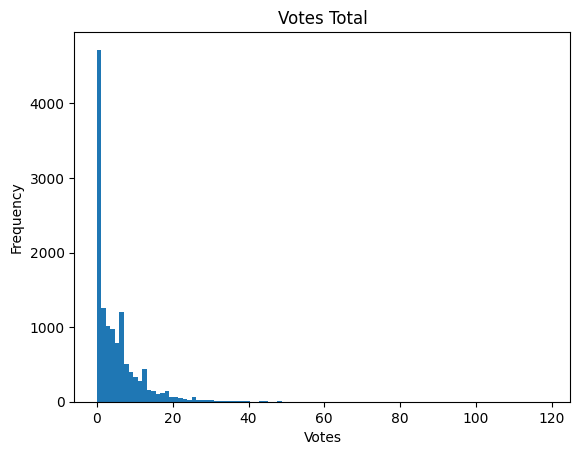

In [4]:
plt.hist(df["votes"], bins=100)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.title("Votes Total")
plt.show()

#### Votes Development All Time

Weeks with high number of popular cards:
            Total Votes  Total Cards  Average Votes per Card
datetime                                                    
2019-06-30          608           54               11.259259
2019-07-07          474           50                9.480000
2019-07-14          527           52               10.134615
2019-07-21          477           57                8.368421
2019-08-04          426           48                8.875000
2019-09-01          279           28                9.964286
2019-09-15          354           45                7.866667
2019-09-29          377           36               10.472222
2019-10-13          338           38                8.894737
2019-10-20          393           50                7.860000
2019-10-27          383           47                8.148936
2019-11-03          257           31                8.290323
2019-11-24          303           31                9.774194
2019-12-15          320           40        

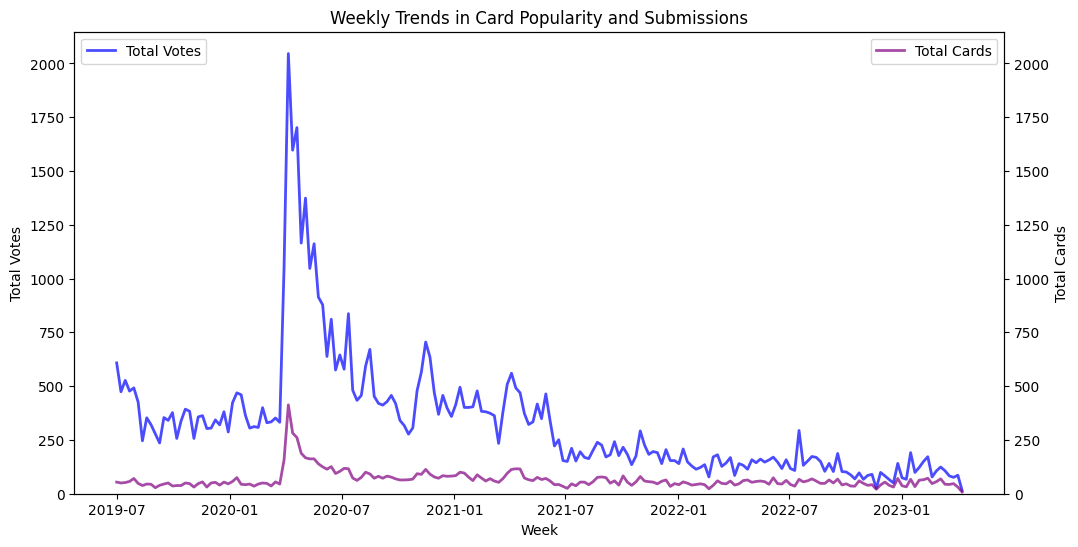

In [5]:
# Resample the data on a weekly basis
weekly_votes = df.resample("W", on="datetime")["votes"].sum()
weekly_cards = df.resample("W", on="datetime")["votes"].count()

# Calculate the average votes per card
weekly_avg_votes = weekly_votes / weekly_cards

# Create a DataFrame with weekly data
weekly_data = pd.DataFrame(
    {
        "Total Votes": weekly_votes,
        "Total Cards": weekly_cards,
        "Average Votes per Card": weekly_avg_votes,
    }
)

# Find weeks with high number of popular cards or a surge in card submissions
high_popularity_weeks = weekly_data[
    weekly_data["Average Votes per Card"]
    > weekly_data["Average Votes per Card"].quantile(0.9)
]
high_submission_weeks = weekly_data[
    weekly_data["Total Cards"] > weekly_data["Total Cards"].quantile(0.9)
]

print("Weeks with high number of popular cards:")
print(high_popularity_weeks)
print("\nWeeks with a surge in card submissions:")
print(high_submission_weeks)

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x=weekly_data.index,
    y=weekly_data["Total Votes"],
    ax=ax,
    color="blue",
    lw=2,
    alpha=0.7,
)
ax.set_ylabel("Total Votes")
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend(["Total Votes"], loc="upper left")

ax2 = ax.twinx()
sns.lineplot(
    x=weekly_data.index,
    y=weekly_data["Total Cards"],
    ax=ax2,
    color="purple",
    lw=2,
    alpha=0.7,
)
ax2.set_ylabel("Total Cards")
ax2.tick_params(axis="y")
ax2.legend(["Total Cards"], loc="upper right")
ax2.set_ylim([0, ax.get_ylim()[1]])

ax.set_title("Weekly Trends in Card Popularity and Submissions")
ax.set_xlabel("Week")

plt.show()

#### Votes Development Recent Month

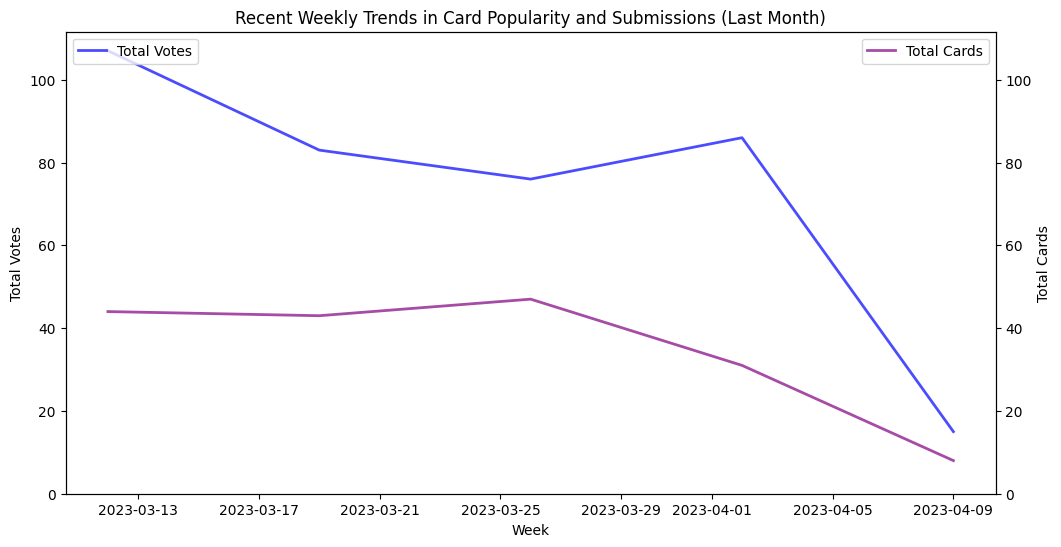

In [6]:
import datetime

# Filter the data to include only the last 4 weeks
one_month_ago = df["datetime"].max() - datetime.timedelta(weeks=4)
recent_weekly_data = weekly_data[weekly_data.index > one_month_ago]

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x=recent_weekly_data.index,
    y=recent_weekly_data["Total Votes"],
    ax=ax,
    color="blue",
    lw=2,
    alpha=0.7,
)
ax.set_ylabel("Total Votes")
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend(["Total Votes"], loc="upper left")

ax2 = ax.twinx()
sns.lineplot(
    x=recent_weekly_data.index,
    y=recent_weekly_data["Total Cards"],
    ax=ax2,
    color="purple",
    lw=2,
    alpha=0.7,
)
ax2.set_ylabel("Total Cards")
ax2.tick_params(axis="y")
ax2.legend(["Total Cards"], loc="upper right")
ax2.set_ylim([0, ax.get_ylim()[1]])

ax.set_title("Recent Weekly Trends in Card Popularity and Submissions (Last Month)")
ax.set_xlabel("Week")

plt.show()

### Cost

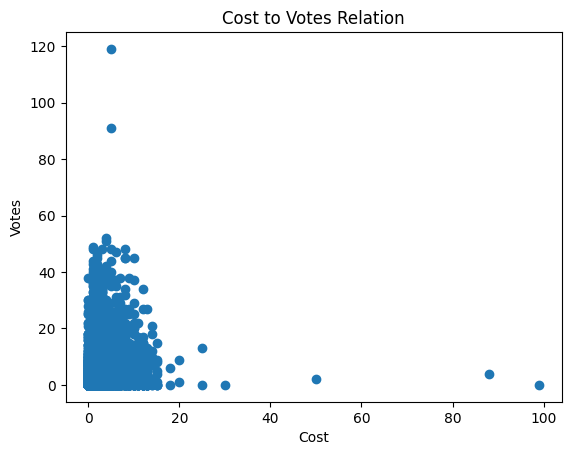

In [7]:
plt.scatter(df["cost"], df["votes"])
plt.xlabel("Cost")
plt.ylabel("Votes")
plt.title("Cost to Votes Relation")
plt.show()

### Type

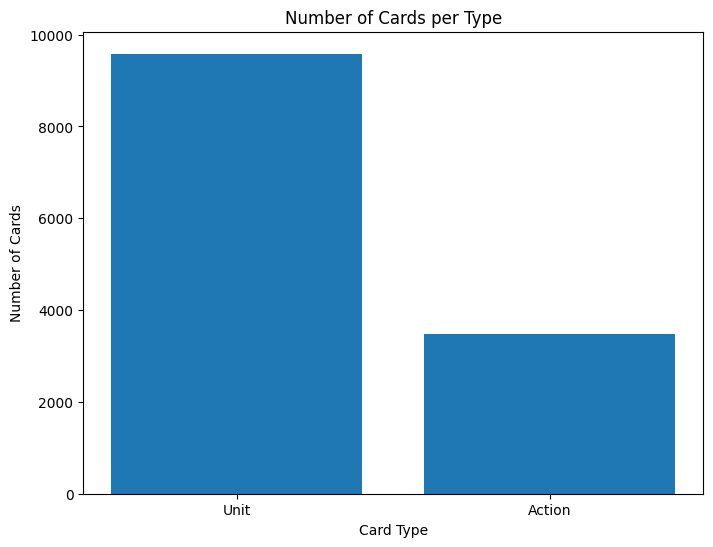

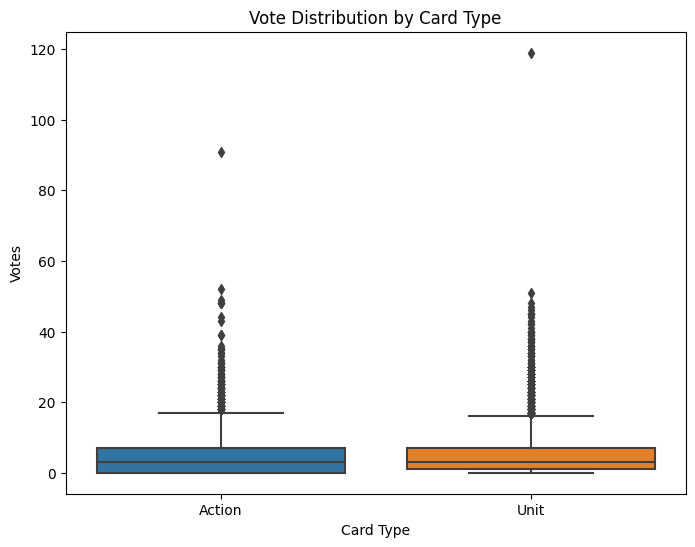

In [8]:
# Calculate the number of cards per type
card_types = df["type"].value_counts()

# Plot the number of cards per type
plt.figure(figsize=(8, 6))
plt.bar(card_types.index, card_types.values)
plt.title("Number of Cards per Type")
plt.xlabel("Card Type")
plt.ylabel("Number of Cards")
plt.show()

# Create box plots for vote distribution per card type
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="votes", data=df)
plt.title("Vote Distribution by Card Type")
plt.xlabel("Card Type")
plt.ylabel("Votes")
plt.show()

### Tribes

In [9]:
tribes = {}
for tribe in df["tribes"]:
    if type(tribe) != str:
        continue
    tribe = tribe.split()
    for t in tribe:
        if t in tribes:
            tribes[t] += 1
        else:
            tribes[t] = 1
tribes = sorted(tribes.items(), key=lambda x: x[1], reverse=True)

#### Cards per Tribe

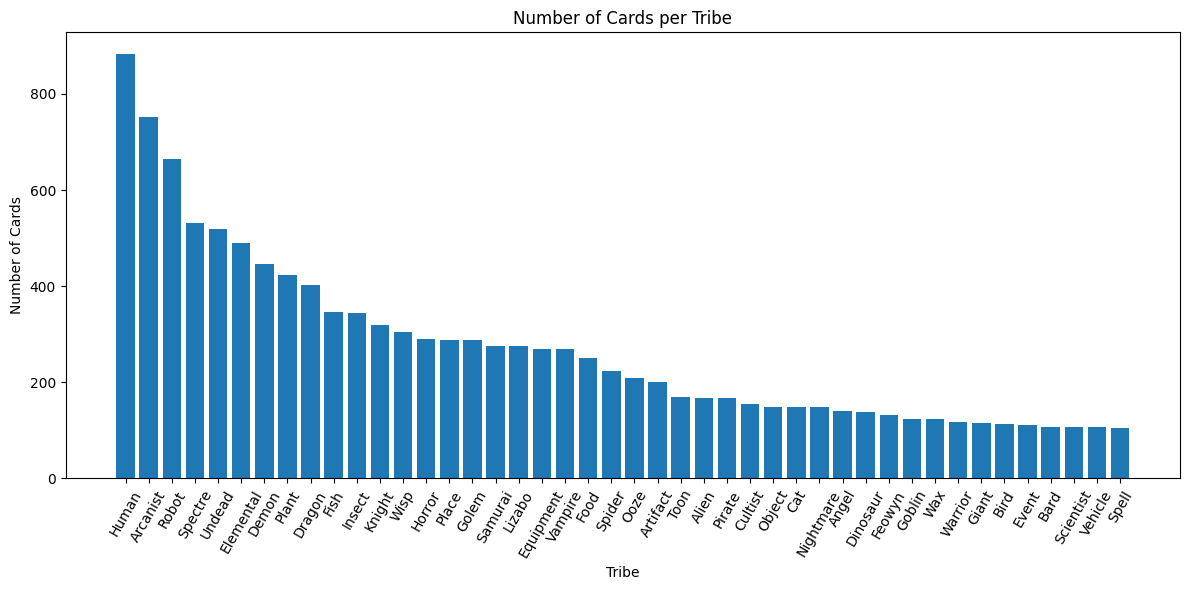

In [10]:
# drop tribes with few cards
threshold = 100
filtered_tribes = [x for x in tribes if x[1] > threshold]

# Plot the result
plt.figure(figsize=(12, 6))
plt.xticks(rotation=60)
plt.bar([x[0] for x in filtered_tribes], [x[1] for x in filtered_tribes])
plt.title("Number of Cards per Tribe")
plt.xlabel("Tribe")
plt.ylabel("Number of Cards")
plt.tight_layout()
plt.show()

#### Votes to Tribes Relation

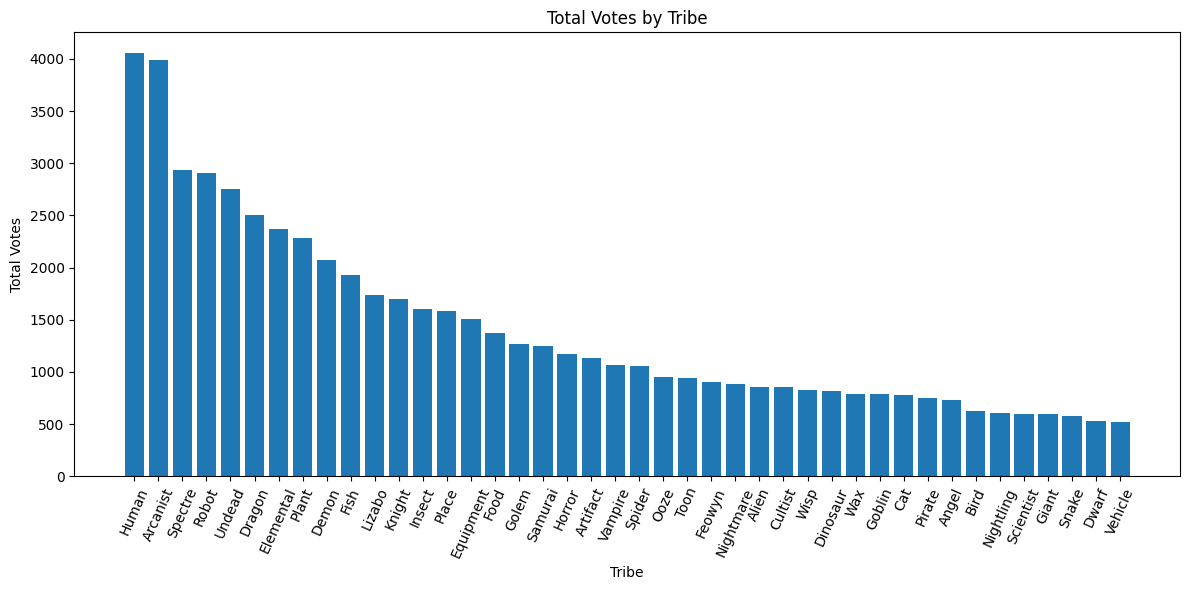

In [11]:
votes_by_tribe = pd.Series([0] * len(tribes), index=[x[0] for x in tribes])
for index, row in df.iterrows():
    if type(row["tribes"]) != str:
        continue
    tribe = row["tribes"].split()
    for t in tribe:
        votes_by_tribe[t] += row["votes"]

# drop tribes with fever votes
votes_by_tribe = votes_by_tribe[votes_by_tribe > 500]

# sort by votes
votes_by_tribe = votes_by_tribe.sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(12, 6))
plt.xticks(rotation=66)
plt.bar(votes_by_tribe.index, votes_by_tribe.values)
plt.title("Total Votes by Tribe")
plt.xlabel("Tribe")
plt.ylabel("Total Votes")
plt.tight_layout()
plt.show()

#### Tribes to Affinity Relation

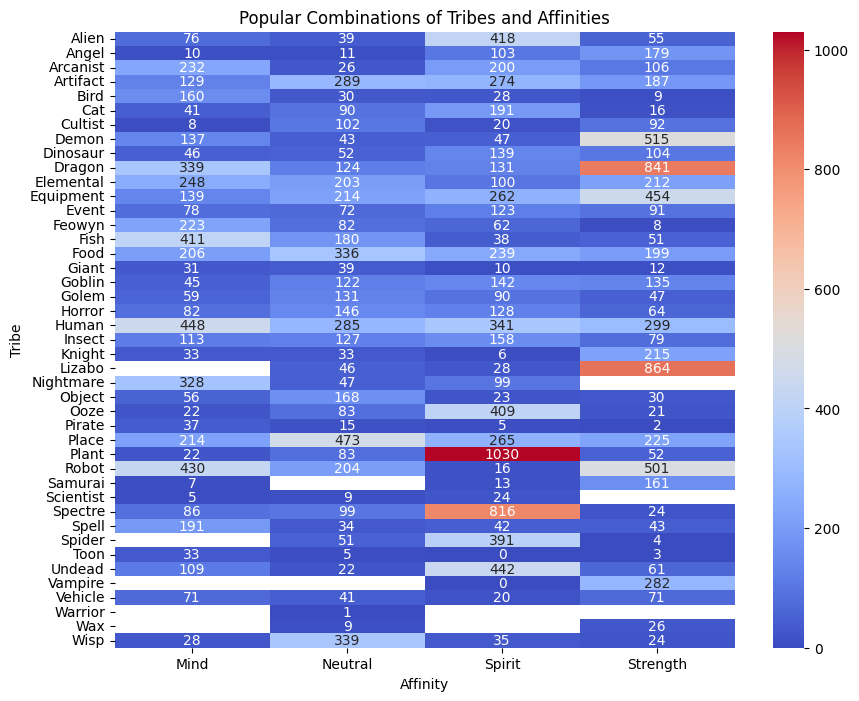

In [12]:
# Define the filtered_tribe_names variable
filtered_tribe_names = [x[0] for x in filtered_tribes]

# Filter the DataFrame based on the filtered tribes
df_filtered_tribes = df[df["tribes"].isin(filtered_tribe_names)]

# Create a pivot table with the sum of votes for each combination of tribe and affinity
tribe_affinity_votes = (
    df_filtered_tribes.groupby(["tribes", "affinity"])["votes"].sum().reset_index()
)
tribe_affinity_pivot = tribe_affinity_votes.pivot_table(
    values="votes", index="tribes", columns="affinity"
)

# Create a heatmap to visualize popular combinations
plt.figure(figsize=(10, 8))
sns.heatmap(tribe_affinity_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Popular Combinations of Tribes and Affinities")
plt.xlabel("Affinity")
plt.ylabel("Tribe")
plt.show()

### Affinity

In [13]:
# Most popular cards overall
overall_top_cards = df.sort_values(by="votes", ascending=False).head(10)

# Most popular cards within each affinity
top_cards_affinity = df.groupby("affinity").apply(
    lambda x: x.sort_values(by="votes", ascending=False).head(3)
)

# Display the leaderboards
print("Most Popular Cards Overall:")
display(overall_top_cards[["name", "votes", "affinity", "tribes"]])

print("\nMost Popular Cards by Affinity:")
display(top_cards_affinity[["name", "votes", "affinity", "tribes"]])

Most Popular Cards Overall:


,name,votes,affinity,tribes
8405,Possum Mama,119,Spirit,Trash Possum
11461,Go to Wyoming,91,Neutral,NaN
2438,Accelerated Growth,52,Spirit,NaN
1836,Lamp Hero,51,Mind,Wax Spectre
2711,Passive & Aggressive,49,Neutral,NaN
540,The Pioneers,48,Neutral,NaN
607,Hearty Breakfast,48,Neutral,Food
3660,"Sogin, Skirmish Scholar",48,Strength,Insect Samurai
5573,Grave Rave,48,Spirit,NaN
1938,Volcano Man,47,Mind,Volcano Elemental



Most Popular Cards by Affinity:


name  votes  affinity             tribes
affinity                                                                   
Mind     1836                 Lamp Hero     51      Mind        Wax Spectre
         1938               Volcano Man     47      Mind  Volcano Elemental
         4163        King of Tall Tales     45      Mind          Nightling
Neutral  11461            Go to Wyoming     91   Neutral                NaN
         2711      Passive & Aggressive     49   Neutral                NaN
         607           Hearty Breakfast     48   Neutral               Food
Spirit   8405               Possum Mama    119    Spirit       Trash Possum
         2438        Accelerated Growth     52    Spirit                NaN
         5573                Grave Rave     48    Spirit                NaN
Strength 3660   Sogin, Skirmish Scholar     48  Strength     Insect Samurai
         2881      Night Shift Merchant     45  Strength          Nightling
         2328           Emergency Fire!     43  Strength                NaN

#### Cards per Affinity

('Spirit', 3304)
('Strength', 3292)
('Mind', 3276)
('Neutral', 3195)


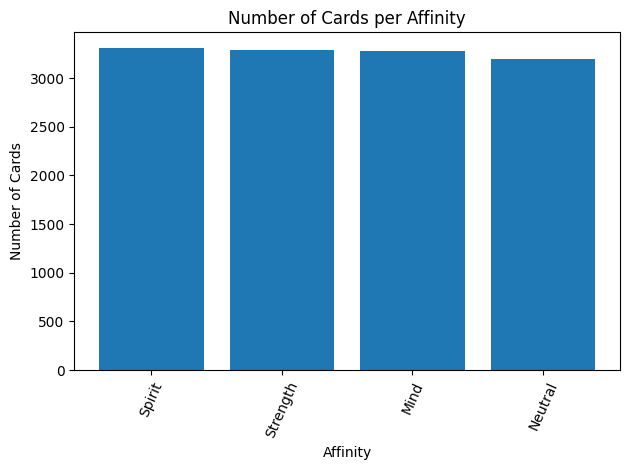

In [14]:
affinities = {}
for affinity in df["affinity"]:
    if pd.isna(affinity):
        affinity = "Neutral"
    if affinity in affinities:
        affinities[affinity] += 1
    else:
        affinities[affinity] = 1
affinities = sorted(affinities.items(), key=lambda x: x[1], reverse=True)

for affinity in affinities:
    print(affinity)

# Plot the result
plt.xticks(rotation=66)
plt.bar([x[0] for x in affinities], [x[1] for x in affinities])
plt.title("Number of Cards per Affinity")
plt.xlabel("Affinity")
plt.ylabel("Number of Cards")
plt.tight_layout()
plt.show()

### Rarity

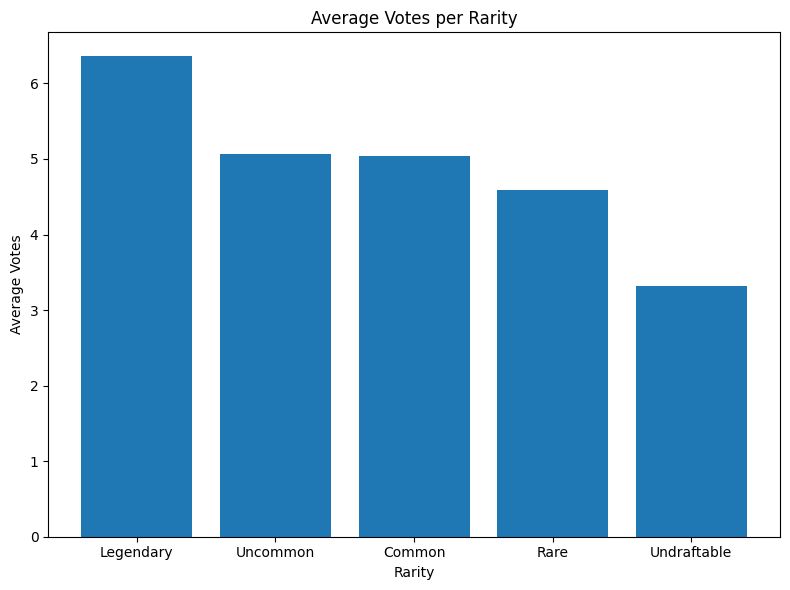

In [15]:
# Group the data by rarity and calculate the mean number of votes for each rarity
rarity_votes = df.groupby("rarity")["votes"].mean()

# Sort the results by the average number of votes
rarity_votes = rarity_votes.sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(8, 6))
plt.bar(rarity_votes.index, rarity_votes.values)
plt.title("Average Votes per Rarity")
plt.xlabel("Rarity")
plt.ylabel("Average Votes")
plt.tight_layout()
plt.show()

### Health/Attack

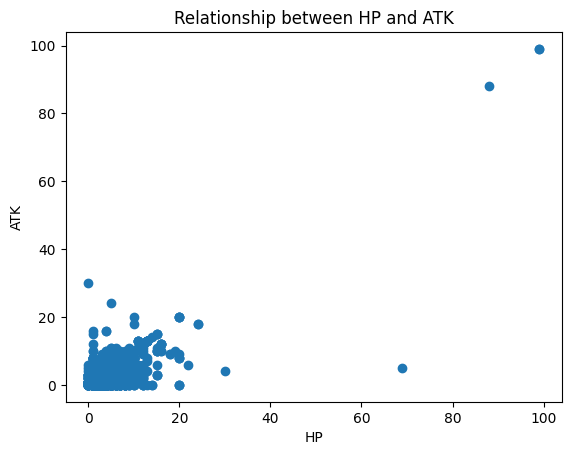

In [16]:
plt.scatter(df["hp"], df["atk"])
plt.xlabel("HP")
plt.ylabel("ATK")
plt.title("Relationship between HP and ATK")
plt.show()

### Ability

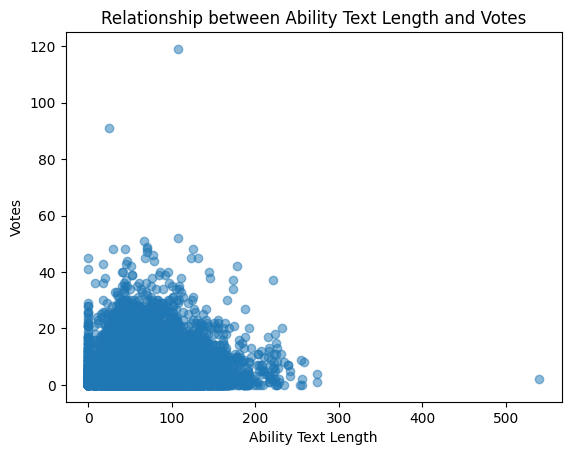

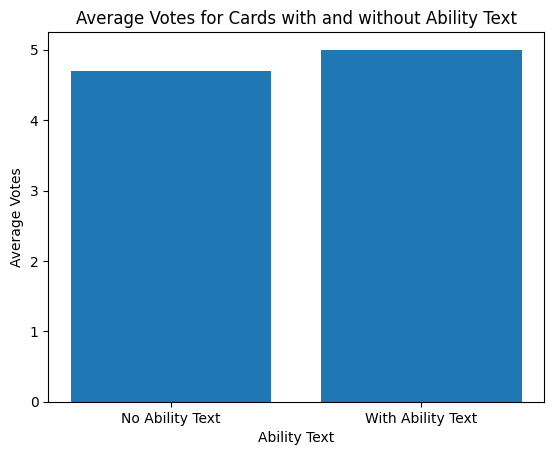

In [17]:
# Create a new column for the length of ability text
df["ability_text_length"] = df["ability_text"].apply(
    lambda x: len(str(x)) if pd.notna(x) else 0
)

# Create a scatter plot to visualize the relationship between ability text length and votes
plt.scatter(df["ability_text_length"], df["votes"], alpha=0.5)
plt.xlabel("Ability Text Length")
plt.ylabel("Votes")
plt.title("Relationship between Ability Text Length and Votes")
plt.show()

# Create a new column to indicate the presence/absence of ability text
df["has_ability_text"] = df["ability_text"].apply(lambda x: 1 if pd.notna(x) else 0)

# Calculate the average votes for cards with and without ability text
average_votes = df.groupby("has_ability_text")["votes"].mean()

# Plot the result as a bar chart
plt.bar(
    average_votes.index,
    average_votes.values,
    tick_label=["No Ability Text", "With Ability Text"],
)
plt.xlabel("Ability Text")
plt.ylabel("Average Votes")
plt.title("Average Votes for Cards with and without Ability Text")
plt.show()

## Cleanup

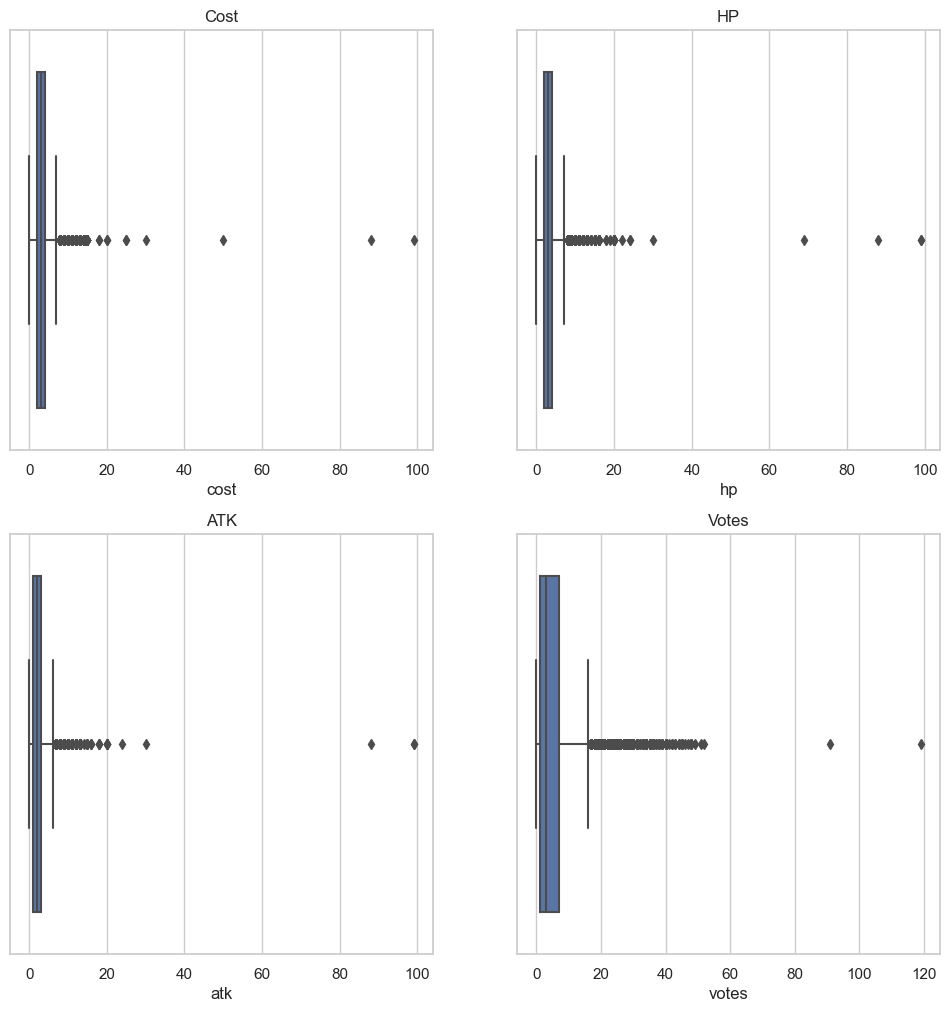

Unique cards:


,name,votes,affinity,tribes,cost,hp,atk
0,Lost Cause,18,Spirit,NaN,3,NaN,NaN
5,Renkil the Chicken,17,Neutral,Chicken,1,1.0,0.0
9,Mountain Valley Giant,22,Neutral,Elemental,8,10.0,10.0
20,Moro Gajima,14,Mind,Human,7,7.0,7.0
21,"Greg, Great Drawer",46,Spirit,Goblin,2,2.0,2.0
...,...,...,...,...,...,...,...
12981,Izar-hauts Caretaker,11,Spirit,Horror,9,7.0,4.0
12993,Shambling Spirit,1,Neutral,Specter,5,8.0,1.0
13015,Radioactive Spinner,4,Neutral,Giant Ooze Spider,15,10.0,6.0
13020,"Ferrog, Waste's Warden",5,Spirit,Dinosaur Kaiju,9,12.0,2.0


In [11]:
# Set the style
sns.set(style="whitegrid")

# Create a boxplot for cost, HP, ATK, and votes
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.boxplot(x="cost", data=df, ax=axes[0, 0])
sns.boxplot(x="hp", data=df, ax=axes[0, 1])
sns.boxplot(x="atk", data=df, ax=axes[1, 0])
sns.boxplot(x="votes", data=df, ax=axes[1, 1])

# Set titles
axes[0, 0].set_title("Cost")
axes[0, 1].set_title("HP")
axes[1, 0].set_title("ATK")
axes[1, 1].set_title("Votes")

plt.show()


# Create a DataFrame with only numerical columns
df_numerical = df[["cost", "hp", "atk", "votes"]]

# Calculate IQR for each attribute
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5 * IQR

# Filter the DataFrame to display unique cards
unique_cards = df[
    ((df_numerical < (Q1 - threshold)) | (df_numerical > (Q3 + threshold))).any(axis=1)
]

# Create a boolean mask to identify unique cards
mask = ((df_numerical < (Q1 - threshold)) | (df_numerical > (Q3 + threshold))).any(
    axis=1
)
df = df[~mask]

# Display the unique cards
print("Unique cards:")
display(unique_cards[["name", "votes", "affinity", "tribes", "cost", "hp", "atk"]])

In [12]:
# Save the cleaned df as .csv
df = df.drop("datetime", axis=1)
df.to_csv("../data/processed_data/cards_cleaned.csv", index=False)